# 1. Introducing Pandas Objects

### Panda Series vs Numpy Structured Arrays

At the very basic level, **Pandas objects can be thought of as enhanced versions of NumPy structured arrays** in which the rows and columns are identified with **labels rather than simple integer indices**.

Essential Difference Between Series and Numpy Arrays:
    

The essential difference is the presence of the index: while the Numpy Array has an 
*implicitly defined* integer index used to access the values, **the Pandas ``Series`` 
has an *explicitly defined* index associated with the values.**

In [2]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

### Panda Series vs Dictionaries

**You can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.**
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.

In [4]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

As you can see the Series will by default create the index where the keys are in the dict.

In [5]:
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

### The Pandas DataFrame Object

In [11]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)


states = pd.DataFrame({'population': population, 'area': area})
states


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### DataFrames as generalised dictionaries

In [16]:
states['area']

#which returns our area series.

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Using GPU runtime to accelerate deep learning prototypes for free with google colab. check later.

# 2. Pandas and Common Data Formats

The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, **DataFrame is a container for Series, and Series is a container for scalars.**

### Quick summaries and transformations

In [19]:
import numpy as np

dates = pd.date_range('20191208', periods=6)
dates

df = pd.DataFrame(np.random.randn(6, 5), index=dates, columns=list('ABCDE'))
df

,A,B,C,D,E
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895
2019-12-10,0.045911,-0.432420,1.140691,0.141145,-0.980267
2019-12-11,-0.157262,1.424062,1.438667,1.748788,0.800257
2019-12-12,0.060814,0.330602,-1.919776,1.157709,1.041634
2019-12-13,0.945739,0.516633,1.145075,0.012045,1.238300


In [21]:
df.to_numpy()

array([[ 1.27057969, -1.11480411,  1.00585944, -0.1618664 ,  0.12463632],
       [-0.03070351, -1.17120091, -1.02025357,  0.09939131, -1.37789548],
       [ 0.04591135, -0.43241986,  1.14069119,  0.14114486, -0.98026707],
       [-0.15726198,  1.42406152,  1.43866656,  1.74878757,  0.80025707],
       [ 0.06081414,  0.3306019 , -1.91977575,  1.1577092 ,  1.04163381],
       [ 0.94573944,  0.51663278,  1.14507515,  0.01204549,  1.23829996]])

In [22]:
df.T

,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00
A,1.270580,-0.030704,0.045911,-0.157262,0.060814,0.945739
B,-1.114804,-1.171201,-0.432420,1.424062,0.330602,0.516633
C,1.005859,-1.020254,1.140691,1.438667,-1.919776,1.145075
D,-0.161866,0.099391,0.141145,1.748788,1.157709,0.012045
E,0.124636,-1.377895,-0.980267,0.800257,1.041634,1.238300


The describe capability gives us the most important high level information regarding the df:

In [23]:
df.describe()

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.355847,-0.074521,0.298377,0.499535,0.141111
std,0.596744,1.017086,1.406142,0.769088,1.096757
min,-0.157262,-1.171201,-1.919776,-0.161866,-1.377895
25%,-0.011550,-0.944208,-0.513725,0.033882,-0.704041
50%,0.053363,-0.050909,1.073275,0.120268,0.462447
75%,0.724508,0.470125,1.143979,0.903568,0.981290
max,1.270580,1.424062,1.438667,1.748788,1.238300


However, if we have more than one datatype, such as the example below, we need to specify this in describe()

(If we leave this as blank - i.e. just describe() - then this will describe only the numerical value.)

(by the same token, the exclude -instead of include - functionality also works in the example below)

In [24]:
df2 = pd.DataFrame({'categorical': pd.Categorical(['B','T','S']), 
                    'numeric': [1, 2, 3], 
                    'object': ['a', 'b', 'c'],
                    'timestamp': pd.Series([np.datetime64("2019-12-08"), 
                                            np.datetime64("2019-12-10"),
                                            np.datetime64("2019-12-12")
                                            ])
                    })
df2

,categorical,numeric,object,timestamp
0,B,1,a,2019-12-08
1,T,2,b,2019-12-10
2,S,3,c,2019-12-12


In [26]:
df2.describe(include='all')

,categorical,numeric,object,timestamp
count,3,3.0,3,3
unique,3,NaN,3,3
top,T,NaN,a,2019-12-10 00:00:00
freq,1,NaN,1,1
first,NaN,NaN,NaN,2019-12-08 00:00:00
last,NaN,NaN,NaN,2019-12-12 00:00:00
mean,NaN,2.0,NaN,NaN
std,NaN,1.0,NaN,NaN
min,NaN,1.0,NaN,NaN
25%,NaN,1.5,NaN,NaN


#### Sorting techniques

In [28]:
print("Sorting by rows")
df.sort_index(axis=0, ascending=False)

Sorting by rows


,A,B,C,D,E
2019-12-13,0.945739,0.516633,1.145075,0.012045,1.238300
2019-12-12,0.060814,0.330602,-1.919776,1.157709,1.041634
2019-12-11,-0.157262,1.424062,1.438667,1.748788,0.800257
2019-12-10,0.045911,-0.432420,1.140691,0.141145,-0.980267
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636


In [30]:
print("\n\nSorting by columns")
df.sort_index(axis=1, ascending=False)



Sorting by columns


,E,D,C,B,A
2019-12-08,0.124636,-0.161866,1.005859,-1.114804,1.270580
2019-12-09,-1.377895,0.099391,-1.020254,-1.171201,-0.030704
2019-12-10,-0.980267,0.141145,1.140691,-0.432420,0.045911
2019-12-11,0.800257,1.748788,1.438667,1.424062,-0.157262
2019-12-12,1.041634,1.157709,-1.919776,0.330602,0.060814
2019-12-13,1.238300,0.012045,1.145075,0.516633,0.945739


In [31]:
print("\n\nSorting columns over date 2019-12-08")
df.sort_values(by='2019-12-08', axis='columns', ascending=False)



Sorting columns over date 2019-12-08


,A,C,E,D,B
2019-12-08,1.270580,1.005859,0.124636,-0.161866,-1.114804
2019-12-09,-0.030704,-1.020254,-1.377895,0.099391,-1.171201
2019-12-10,0.045911,1.140691,-0.980267,0.141145,-0.432420
2019-12-11,-0.157262,1.438667,0.800257,1.748788,1.424062
2019-12-12,0.060814,-1.919776,1.041634,1.157709,0.330602
2019-12-13,0.945739,1.145075,1.238300,0.012045,0.516633


### Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.


* **.at**: get scalar values. It's a very fast loc
* **.iat**: Get scalar values. It's a very fast iloc
* **.loc**: only work on index
* **.iloc**: work on position

In [34]:
df

,A,B,C,D,E
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895
2019-12-10,0.045911,-0.432420,1.140691,0.141145,-0.980267
2019-12-11,-0.157262,1.424062,1.438667,1.748788,0.800257
2019-12-12,0.060814,0.330602,-1.919776,1.157709,1.041634
2019-12-13,0.945739,0.516633,1.145075,0.012045,1.238300


In [33]:
df.loc[dates[0]]

A    1.270580
B   -1.114804
C    1.005859
D   -0.161866
E    0.124636
Name: 2019-12-08 00:00:00, dtype: float64

***By using the commas we can slice for both the rows and the columns as shown below.***

In [35]:
df.loc[:,['A','B']]

,A,B
2019-12-08,1.270580,-1.114804
2019-12-09,-0.030704,-1.171201
2019-12-10,0.045911,-0.432420
2019-12-11,-0.157262,1.424062
2019-12-12,0.060814,0.330602
2019-12-13,0.945739,0.516633


iloc works on the index position

In [37]:
df.iloc[1,1]

-1.1712009082020347

### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['F'])
df1.loc[dates[0]:dates[1],'F'] = 1
df1

#the default when adding a new column 'F' is NaN.

,A,B,C,D,E,F
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636,1.0
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895,1.0
2019-12-10,0.045911,-0.432420,1.140691,0.141145,-0.980267,NaN
2019-12-11,-0.157262,1.424062,1.438667,1.748788,0.800257,NaN


To drop NaN values uses the dropna method:

In [47]:
df1.dropna(how = 'any')

,A,B,C,D,E,F
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636,1.0
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895,1.0


You can fill them with whatever values you want

In [48]:
df1.fillna(value=5)

,A,B,C,D,E,F
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636,1.0
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895,1.0
2019-12-10,0.045911,-0.432420,1.140691,0.141145,-0.980267,5.0
2019-12-11,-0.157262,1.424062,1.438667,1.748788,0.800257,5.0


### Shift

**Note**:
* DataFrame.shift(self, periods=1, freq=None, axis=0, fill_value=None)[source]
* Shift index by desired number of periods with an optional time freq.


See example below:

In [49]:
dates = pd.date_range('20191208', periods=6)
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2019-12-08    1.0
2019-12-09    3.0
2019-12-10    5.0
2019-12-11    NaN
2019-12-12    6.0
2019-12-13    8.0
Freq: D, dtype: float64

In [51]:
s.shift(2)
#This moves it down the column two.

2019-12-08    NaN
2019-12-09    NaN
2019-12-10    1.0
2019-12-11    3.0
2019-12-12    5.0
2019-12-13    NaN
Freq: D, dtype: float64

If we use a DataFrame, then we can shift this along columns, see below:

In [79]:
df_s = pd.DataFrame(s, columns=['values'])
df_s
#NOTE for writing the columns it has to be array like - so need to do []

,values
2019-12-08,1.0
2019-12-09,3.0
2019-12-10,5.0
2019-12-11,NaN
2019-12-12,6.0
2019-12-13,8.0


In [81]:
df_s.shift(periods =1, axis = 'columns')
#all the values have been shfit to the right(no column there) and replaced with default NaN values.

,values
2019-12-08,NaN
2019-12-09,NaN
2019-12-10,NaN
2019-12-11,NaN
2019-12-12,NaN
2019-12-13,NaN


### Apply

The apply method applies functions over data in dataframes.

In [82]:
df

,A,B,C,D,E
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636
2019-12-09,-0.030704,-1.171201,-1.020254,0.099391,-1.377895
2019-12-10,0.045911,-0.432420,1.140691,0.141145,-0.980267
2019-12-11,-0.157262,1.424062,1.438667,1.748788,0.800257
2019-12-12,0.060814,0.330602,-1.919776,1.157709,1.041634
2019-12-13,0.945739,0.516633,1.145075,0.012045,1.238300


In [84]:
df.apply(np.cumsum)
#here we can see that along each columns the cumsum function is applied.

,A,B,C,D,E
2019-12-08,1.270580,-1.114804,1.005859,-0.161866,0.124636
2019-12-09,1.239876,-2.286005,-0.014394,-0.062475,-1.253259
2019-12-10,1.285788,-2.718425,1.126297,0.078670,-2.233526
2019-12-11,1.128526,-1.294363,2.564964,1.827457,-1.433269
2019-12-12,1.189340,-0.963761,0.645188,2.985167,-0.391635
2019-12-13,2.135079,-0.447129,1.790263,2.997212,0.846665


Similarily, we can apply lambda functions within our apply:

In [85]:
df.apply(lambda x: x.max() - x.min())

A    1.427842
B    2.595262
C    3.358442
D    1.910654
E    2.616195
dtype: float64

# 3. Pandas Continued

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
dates = pd.date_range('20191208', periods=6)

df = pd.DataFrame(np.random.randn(6, 5), index=dates, columns=list('ABCDE'))
df

,A,B,C,D,E
2019-12-08,-1.257922,-0.056144,1.004249,-0.240995,-0.113777
2019-12-09,-1.397634,-0.940255,0.302400,-0.770559,0.428410
2019-12-10,0.371248,1.660974,-0.992078,-0.514107,3.203495
2019-12-11,-0.592854,0.930056,-0.186897,-0.085305,0.192585
2019-12-12,0.808993,-0.319915,-0.343981,0.751935,-1.719857
2019-12-13,-0.735056,0.783595,-0.351040,0.082230,-2.036200


### Setting Options

pandas has an options system that lets you customize some aspects of its behaviour, display-related options being those the user is most likely to adjust.

The most important settings are:

*   **get_option() / set_option()**
*   **reset_option()**

In [91]:
pd.get_option("display.max_rows")
df

,A,B,C,D,E
2019-12-08,-1.257922,-0.056144,1.004249,-0.240995,-0.113777
2019-12-09,-1.397634,-0.940255,0.302400,-0.770559,0.428410
2019-12-10,0.371248,1.660974,-0.992078,-0.514107,3.203495
2019-12-11,-0.592854,0.930056,-0.186897,-0.085305,0.192585
2019-12-12,0.808993,-0.319915,-0.343981,0.751935,-1.719857
2019-12-13,-0.735056,0.783595,-0.351040,0.082230,-2.036200


In [92]:
pd.get_option("display.max_columns")
df

,A,B,C,D,E
2019-12-08,-1.257922,-0.056144,1.004249,-0.240995,-0.113777
2019-12-09,-1.397634,-0.940255,0.302400,-0.770559,0.428410
2019-12-10,0.371248,1.660974,-0.992078,-0.514107,3.203495
2019-12-11,-0.592854,0.930056,-0.186897,-0.085305,0.192585
2019-12-12,0.808993,-0.319915,-0.343981,0.751935,-1.719857
2019-12-13,-0.735056,0.783595,-0.351040,0.082230,-2.036200


By the same token, the set_option allows you to set certain options to the DataFrame:

In [93]:
pd.set_option("display.max_columns", 2)
df

,A,...,E
2019-12-08,-1.257922,...,-0.113777
2019-12-09,-1.397634,...,0.428410
2019-12-10,0.371248,...,3.203495
2019-12-11,-0.592854,...,0.192585
2019-12-12,0.808993,...,-1.719857
2019-12-13,-0.735056,...,-2.036200


In [94]:
pd.set_option("display.max_rows", 2)
df

,A,...,E
2019-12-08,-1.257922,...,-0.113777
...,...,...,...
2019-12-13,-0.735056,...,-2.036200


However, if you have been playing around and you wish to return to the natural state - then you can use re
reset_option

In [106]:
pd.reset_option("display.max_columns")

In [107]:
df

,A,B,C,D,E
2019-12-08,-1.257922,-0.056144,1.004249,-0.240995,-0.113777
2019-12-09,-1.397634,-0.940255,0.302400,-0.770559,0.428410
2019-12-10,0.371248,1.660974,-0.992078,-0.514107,3.203495
2019-12-11,-0.592854,0.930056,-0.186897,-0.085305,0.192585
2019-12-12,0.808993,-0.319915,-0.343981,0.751935,-1.719857
2019-12-13,-0.735056,0.783595,-0.351040,0.082230,-2.036200


We can use the get_option to display precision and set_option to change it

In [111]:
pd.get_option("display.precision")

6

In [113]:
pd.set_option("display.precision", 3)
df

,A,B,C,D,E
2019-12-08,-1.258,-0.056,1.004,-0.241,-0.114
2019-12-09,-1.398,-0.940,0.302,-0.771,0.428
2019-12-10,0.371,1.661,-0.992,-0.514,3.203
2019-12-11,-0.593,0.930,-0.187,-0.085,0.193
2019-12-12,0.809,-0.320,-0.344,0.752,-1.720
2019-12-13,-0.735,0.784,-0.351,0.082,-2.036


### Boolean Indexing

In [114]:
df

,A,B,C,D,E
2019-12-08,-1.258,-0.056,1.004,-0.241,-0.114
2019-12-09,-1.398,-0.940,0.302,-0.771,0.428
2019-12-10,0.371,1.661,-0.992,-0.514,3.203
2019-12-11,-0.593,0.930,-0.187,-0.085,0.193
2019-12-12,0.809,-0.320,-0.344,0.752,-1.720
2019-12-13,-0.735,0.784,-0.351,0.082,-2.036


In [116]:
df[df>0]

#This turns all values that are below 0 (i..e dont meet the condition) to NaN by default.

,A,B,C,D,E
2019-12-08,NaN,NaN,1.004,NaN,NaN
2019-12-09,NaN,NaN,0.302,NaN,0.428
2019-12-10,0.371,1.661,NaN,NaN,3.203
2019-12-11,NaN,0.930,NaN,NaN,0.193
2019-12-12,0.809,NaN,NaN,0.752,NaN
2019-12-13,NaN,0.784,NaN,0.082,NaN


### Categoricals

In [118]:
df_cat = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df_cat

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [119]:
df_cat["grade"] = df_cat["raw_grade"].astype("category")
df_cat

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [120]:
df_cat["grade"].cat.categories = ["very good", "good", "very bad"]
df_cat

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [123]:
df_cat.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

You can sort the values by grade - and this is determined by how you order the categories to begin with:

In [124]:
df_cat.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
5,6,e,very bad
2,3,b,good
1,2,b,good
4,5,a,very good
3,4,a,very good
0,1,a,very good


In [125]:
df_cat.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

### Merge

You can concatenate objects together in python using concat():

In [126]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.962,2.149,0.179,1.196
1,0.509,-0.217,0.267,2.354
2,-0.890,0.066,-1.020,1.902
3,-1.211,0.328,-0.131,2.561
4,-0.025,1.120,-0.562,1.191
5,-0.372,1.362,-0.188,0.217
6,-1.740,0.514,0.610,1.375
7,-0.323,-0.741,0.879,-0.554
8,-1.095,-0.187,-1.103,-1.485
9,0.507,0.302,0.084,-1.942


In [127]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[       0      1      2      3
 0 -0.962  2.149  0.179  1.196
 1  0.509 -0.217  0.267  2.354
 2 -0.890  0.066 -1.020  1.902,        0      1      2      3
 3 -1.211  0.328 -0.131  2.561
 4 -0.025  1.120 -0.562  1.191
 5 -0.372  1.362 -0.188  0.217
 6 -1.740  0.514  0.610  1.375,        0      1      2      3
 7 -0.323 -0.741  0.879 -0.554
 8 -1.095 -0.187 -1.103 -1.485
 9  0.507  0.302  0.084 -1.942]

In [128]:
pd.concat(pieces)

,0,1,2,3
0,-0.962,2.149,0.179,1.196
1,0.509,-0.217,0.267,2.354
2,-0.890,0.066,-1.020,1.902
3,-1.211,0.328,-0.131,2.561
4,-0.025,1.120,-0.562,1.191
5,-0.372,1.362,-0.188,0.217
6,-1.740,0.514,0.610,1.375
7,-0.323,-0.741,0.879,-0.554
8,-1.095,-0.187,-1.103,-1.485
9,0.507,0.302,0.084,-1.942


### Join

In [129]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [130]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [138]:
pd.merge(left, right, on= 'key')

#Note here that there needs to be a shared column to merge

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

This allows us to add rows to the end of a dataframe

In [141]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.419,-0.523,1.987,-0.947
1,0.525,-0.674,-0.877,-0.768
2,0.089,-0.642,-1.229,-0.147
3,-0.877,-0.352,-0.166,-0.794
4,-0.409,0.836,-0.232,0.434
5,-0.082,-1.996,1.527,-0.351
6,0.351,-0.529,0.474,-1.819
7,-1.020,2.888,-0.044,0.793


In [142]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.419,-0.523,1.987,-0.947
1,0.525,-0.674,-0.877,-0.768
2,0.089,-0.642,-1.229,-0.147
3,-0.877,-0.352,-0.166,-0.794
4,-0.409,0.836,-0.232,0.434
5,-0.082,-1.996,1.527,-0.351
6,0.351,-0.529,0.474,-1.819
7,-1.020,2.888,-0.044,0.793
8,-0.877,-0.352,-0.166,-0.794


### Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [144]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [145]:
df

,A,B,C,D
0,foo,one,0.152,-0.115
1,bar,one,1.588,-0.489
2,foo,two,-1.352,1.057
3,bar,three,-0.361,-0.579
4,foo,two,0.952,-0.800
5,bar,two,-0.843,-0.850
6,foo,one,-0.662,-2.314
7,foo,three,-0.512,-0.611


In [152]:
df.groupby('B').sum()


#here we can see it takes the distinct values under column B and then it groups together
#NOTE: A is not grouped here - is it because it is non-numerical value?

,C,D
B,,
one,1.077,-2.918
three,-0.874,-1.190
two,-1.243,-0.592


If, like the above case, we have multiple columns with non-numerical values and we want to group the values 
according to these, then what we can do is group by both columns ('A' and 'B' in this case).

In [155]:
df.groupby(['A', 'B']).sum()

C      D
A   B                  
bar one    1.588 -0.489
    three -0.361 -0.579
    two   -0.843 -0.850
foo one   -0.510 -2.429
    three -0.512 -0.611
    two   -0.400  0.258

### Reshaping

#### Stack

In [159]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

print(tuples)

#Note that * this is the standard syntax for zip in python; i.e. we need to make sure it zips all lists:
#Syntax =  zip(*iterables)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


Side note - using the Glob() method To Match Path, Directory, File Names with Examples

See more: https://www.poftut.com/python-glob-function-to-match-path-directory-file-names-with-examples/

Using Multi Index:

In [161]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [163]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A      B
first second              
bar   one     0.477  0.021
      two    -0.247 -0.921
baz   one    -0.074  0.489
      two    -0.056 -0.231
foo   one     0.596 -0.944
      two     0.571  0.064
qux   one     0.894  1.435
      two    -0.375 -1.086

**Stack**

What it does: Stacks the prescribed level(s) from columns to index.

In [176]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.477
               B    0.021
       two     A   -0.247
               B   -0.921
baz    one     A   -0.074
               B    0.489
       two     A   -0.056
               B   -0.231
foo    one     A    0.596
               B   -0.944
       two     A    0.571
               B    0.064
qux    one     A    0.894
               B    1.435
       two     A   -0.375
               B   -1.086
dtype: float64

If you wish to unstack:

In [177]:
stacked.unstack()

A      B
first second              
bar   one     0.477  0.021
      two    -0.247 -0.921
baz   one    -0.074  0.489
      two    -0.056 -0.231
foo   one     0.596 -0.944
      two     0.571  0.064
qux   one     0.894  1.435
      two    -0.375 -1.086

**Pivot Tables**

In [179]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,1.233,-0.789
1,one,B,foo,1.219,-0.362
2,two,C,foo,-1.792,-0.485
3,three,A,bar,0.127,0.441
4,one,B,bar,0.297,-0.699
5,one,C,bar,-0.982,-1.189
6,two,A,foo,1.047,0.058
7,three,B,foo,-0.271,0.113
8,one,C,foo,-0.066,1.712
9,one,A,bar,0.037,0.882


In [183]:
#We use pivot tables if we want desired output summary of stats for speciifc value in this case D.

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C          bar    foo
A     B              
one   A  0.037  1.233
      B  0.297  1.219
      C -0.982 -0.066
three A  0.127    NaN
      B    NaN -0.271
      C  2.042    NaN
two   A    NaN  1.047
      B -0.955    NaN
      C    NaN -1.792

## Time Series

In pandas, date and time data comes in a few flavors, which we will discuss here:

- **Time stamps** reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- **Time intervals** and *periods* reference a length of time between a particular beginning and end point; periods normally refers to special lengths of time with uniform intervals (such as day = 24 hrs)
- **Time deltas** or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

The built in datetime and dateutil modules are our best starting point for timeseries:

In [184]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

With the dateutil module you can parse from strings:

In [185]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [187]:
#printing day of the week, for example:
date.strftime("%A")

'Saturday'

**Numpy's datetime64**

In [188]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

From this we can easily conduct vectorized operations:

In [189]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

**TimeStamp**

In [190]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [191]:
date + np.arange(12)

ValueError: Cannot add integral value to Timestamp without freq.

In [199]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

**Indexing TimeSeries by Time**

What is very useful here with pandas is that we can index using timestamps - by using DateTimeIndex.

In [200]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [201]:
data.index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [202]:
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

### Fundamental Time Series Structures

The fundamental Pandas data structures for working with time series data:

- For **time stamps**, Pandas provides the ``Timestamp`` type. The associated Index structure is ``DatetimeIndex``.
- For **time Periods**, Pandas provides the ``Period`` type. The associated index structure is ``PeriodIndex``.
- For **time deltas** or *durations*, Pandas provides the ``Timedelta`` type. The associated index structure is ``TimedeltaIndex``.


However, out of these three, the most fundamental are ``Timestamp`` and its assocaited ``DatetimeIndex``.

In [204]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [206]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A time delta index is created when a dat is subtracted from another:

In [207]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

**pd.date_range( )**

In [208]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [210]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create Period or Timedelta values, we use the pd.date_period() method:

In [211]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

### Frequencies and offsets

In [212]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [216]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Cleaning data. Small example

# Pandas functionality introduction and Class Exercises

In [27]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv("/Users/laurencewilliams/Downloads/pythondevsurvey2017_raw_data.csv")
data.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel


In [29]:
data.describe(exclude = np.number)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
count,9506,805,2650,4460,3333,1470,1363,501,3075,196,...,831,1226,361,1142,423,458,680,590,9502,9502
unique,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,7,154
top,Yes,None,Java,JavaScript,C/C++,PHP,C#,Ruby,Bash / Shell,Objective-C,...,Technical support,Data analyst,Business analyst,Team lead,Product manager,CIO / CEO / CTO,Systems analyst,Other - Write In:,21-29,United States
freq,6417,805,2650,4460,3333,1470,1363,501,3075,196,...,831,1226,361,1142,423,458,680,590,3717,1638


In [37]:
data.iloc[4,2]

'Java'

In [40]:
data.dropna(how= 'any')
#will drop any rows with an Nan value which here we can see is all rows

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?


In [41]:
data.dropna(how= 'all')
#here drops only those with ALL rows have Nan

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel
5,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-29,Germany
6,Yes,NaN,Java,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,Technical support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,United States
7,"No, I don’t use Python for my current projects",NaN,NaN,JavaScript,NaN,PHP,NaN,Ruby,NaN,NaN,...,Technical support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-39,Brazil
8,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-39,France
9,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Ruby,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other - Write In:,21-29,United States


In [45]:
data['Is Python the main language you use for your current projects?'].value_counts()

Yes                                               6417
No, I use Python as a secondary language          1695
No, I don’t use Python for my current projects    1394
Name: Is Python the main language you use for your current projects?, dtype: int64

In [49]:
data['What country do you live in?'].value_counts().head()

United States     1638
India             1343
China              710
United Kingdom     521
Germany            417
Name: What country do you live in?, dtype: int64

In [48]:
#Plot those that use python as primary language and where they live in

In [59]:
new_data = data.loc[:, ['Is Python the main language you use for your current projects?', 'What country do you live in?']]
new_data.head()

,Is Python the main language you use for your current projects?,What country do you live in?
0,Yes,Italy
1,Yes,United Kingdom
2,Yes,France
3,"No, I don’t use Python for my current projects",Spain
4,Yes,Israel


In [60]:
#how to put ues only as the x axis and plot that agains the countries

In [121]:
new_data.head(3)

,Is Python the main language you use for your current projects?,What country do you live in?
0,Yes,Italy
1,Yes,United Kingdom
2,Yes,France


In [124]:
for i in new_data.

RangeIndex(start=0, stop=9506, step=1)

In [131]:
for i in new_data.iloc[:,0]:
    if i != 'Yes':
        new_data.iloc[:,0].drop(i, axis = 0)

KeyError: "['No, I don’t use Python for my current projects'] not found in axis"

In [66]:
counts = data["What do you use Python for the most?"].value_counts()
counts.sum()

8112

In [74]:
(counts[0:5]/counts.sum()).head()

Web development                                                0.260355
Data analysis                                                  0.176282
Educational purposes                                           0.094058
DevOps / System administration / Writing automation scripts    0.092949
Machine learning                                               0.085799
Name: What do you use Python for the most?, dtype: float64

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#NOTE: Need to add %matplotlib inline in order to PLOT otherwise when you do .plot() nothing shows

In [117]:
selected_sum = data.loc[12:20, "Is Python the main language you use for your current projects?"].value_counts()
selected_sum

Yes                                               5
No, I use Python as a secondary language          3
No, I don’t use Python for my current projects    1
Name: Is Python the main language you use for your current projects?, dtype: int64

In [118]:
selected_counts = (selected_sum / selected_sum.sum()*100).head()
selected_counts

Yes                                               55.555556
No, I use Python as a secondary language          33.333333
No, I don’t use Python for my current projects    11.111111
Name: Is Python the main language you use for your current projects?, dtype: float64

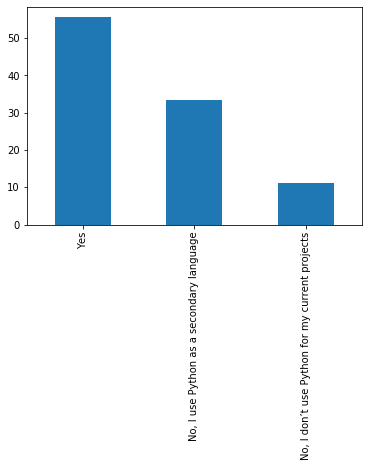

In [119]:
selected_counts.plot.bar()

#How to access based on column name.
#How to delete based on that.

Python
Get names of indexes for which column Age has value 30
indexNames = dfObj[ dfObj['Age'] == 30 ].index
Delete these row indexes from dataFrame
dfObj.drop(indexNames , inplace=True)
1
2
3
4
5
Get names of indexes for which column Age has value 30
indexNames = dfObj[ dfObj['Age'] == 30 ].index
 
Delete these row indexes from dataFrame
dfObj.drop(indexNames , inplace=True)

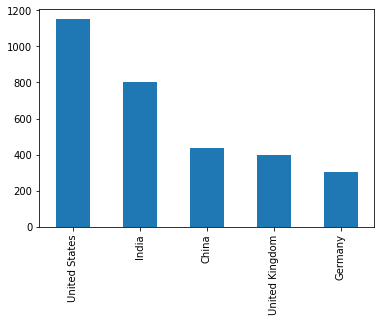

In [155]:
index_not_yes = new_data[new_data["Is Python the main language you use for your current projects?"] != 'Yes'].index
new_data.drop(index_not_yes, inplace=True)
new_data['What country do you live in?'].value_counts().head().plot.bar()

In [167]:
#What to do next -> change Nan to interger or that 0 not understood as a number